In [1]:
# =========================================================
# 📘 WORLD POPULATION ANALYSIS & VISUALIZATION NOTEBOOK
# =========================================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_absolute_error

# Matplotlib & Seaborn Styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (10, 6)

# 2️⃣ Load Dataset
df = pd.read_csv(r"C:\Users\nikhi\Downloads\Hackotberfest2025\World_population\population_data.csv")
print("✅ Data loaded successfully with shape:", df.shape)
df.head()


✅ Data loaded successfully with shape: (233, 12)


,id,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%
1,2,China,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%


In [2]:

# 3️⃣ Data Cleaning Functions
def clean_percent(x):
    if pd.isna(x): return np.nan
    s = str(x).replace('%', '').replace(',', '').replace('−', '-').strip()
    try: return float(s)
    except: return np.nan

def clean_number(x):
    if pd.isna(x): return np.nan
    s = str(x).replace(',', '').replace('−', '-').strip()
    try: return float(s)
    except: return np.nan

df.rename(columns={
    'Country (or dependency)': 'Country',
    'Population 2025': 'Population2025',
    'Yearly Change': 'YearlyChange',
    'Net Change': 'NetChange',
    'Density (P/Km²)': 'Density',
    'Land Area (Km²)': 'LandArea',
    'Migrants (net)': 'MigrantsNet',
    'Fert. Rate': 'FertilityRate',
    'Median Age': 'MedianAge',
    'Urban Pop %': 'UrbanPop',
    'World Share': 'WorldShare'
}, inplace=True)

# Apply cleaning
for col in ['YearlyChange','UrbanPop','WorldShare']:
    df[col] = df[col].apply(clean_percent)
for col in ['NetChange','MigrantsNet','LandArea','Density','Population2025','FertilityRate','MedianAge']:
    df[col] = df[col].apply(clean_number)

df.dropna(subset=['Population2025'], inplace=True)
print("✅ Cleaned dataset shape:", df.shape)
df.describe()


✅ Cleaned dataset shape: (233, 12)


,id,Population2025,YearlyChange,NetChange,Density,LandArea,MigrantsNet,FertilityRate,MedianAge,UrbanPop,WorldShare
count,233.000000,2.330000e+02,233.000000,2.330000e+02,233.000000,2.330000e+02,2.330000e+02,233.000000,233.000000,210.000000,233.000000
mean,117.000000,3.532080e+07,0.886652,2.989357e+05,487.673820,5.583427e+05,8.673820e+01,2.306094,31.896996,60.759048,0.429227
std,67.405489,1.391905e+08,1.270946,1.076330e+06,2412.937646,1.694270e+06,1.848009e+05,1.134316,9.860936,22.559653,1.690691
min,1.000000,5.010000e+02,-3.390000,-3.225184e+06,0.000000,0.000000e+00,-1.235336e+06,0.690000,14.500000,11.500000,0.000006
25%,59.000000,4.663300e+05,-0.040000,-3.200000e+01,38.000000,2.830000e+03,-1.273000e+04,1.470000,22.900000,42.800000,0.005700
50%,117.000000,5.731206e+06,0.830000,1.787900e+04,98.000000,8.220000e+04,-5.810000e+02,1.940000,32.800000,62.050000,0.070000
75%,175.000000,2.407458e+07,1.850000,2.131530e+05,256.000000,4.103400e+05,1.866000e+03,2.950000,39.800000,80.175000,0.290000
max,233.000000,1.463866e+09,4.070000,1.292973e+07,25732.000000,1.637687e+07,1.702358e+06,5.940000,57.400000,99.800000,17.780000


C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\2038257903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Country", y="Population2025", palette="coolwarm")
C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\2038257903.py:11: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\nikhi\Downloads\venv_op\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


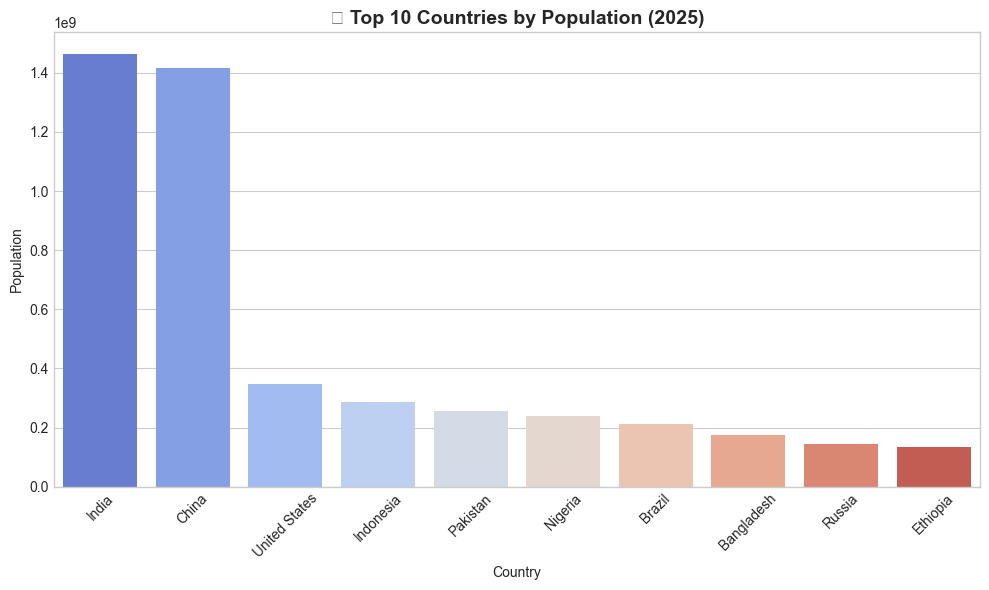

In [3]:


# =========================================================
# 📊 4️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# =========================================================

# --- A. Top 10 countries by population ---
top10 = df.sort_values("Population2025", ascending=False).head(10)
sns.barplot(data=top10, x="Country", y="Population2025", palette="coolwarm")
plt.title("🌍 Top 10 Countries by Population (2025)", fontsize=14, fontweight='bold')
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\3729528578.py:10: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\nikhi\Downloads\venv_op\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


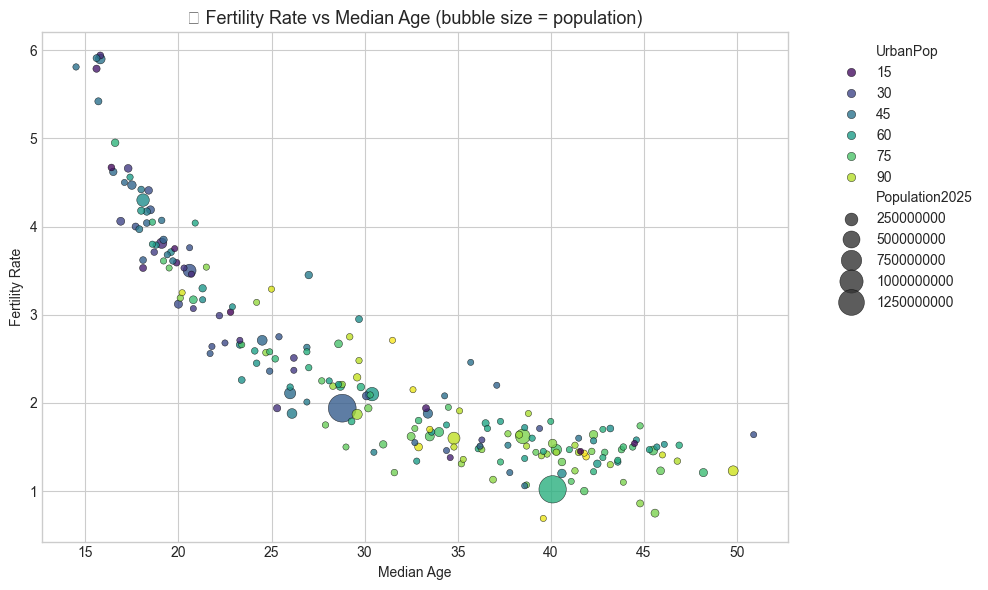

In [4]:


# Insight: India and China lead with over a billion people each.

# --- B. Fertility Rate vs Median Age ---
sns.scatterplot(data=df, x="MedianAge", y="FertilityRate", size="Population2025",
                hue="UrbanPop", sizes=(20, 400), palette="viridis", alpha=0.8, edgecolor="k")
plt.title("👶 Fertility Rate vs Median Age (bubble size = population)", fontsize=13)
plt.xlabel("Median Age")
plt.ylabel("Fertility Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\1500108779.py:8: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\1500108779.py:8: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\nikhi\Downloads\venv_op\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nikhi\Downloads\venv_op\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


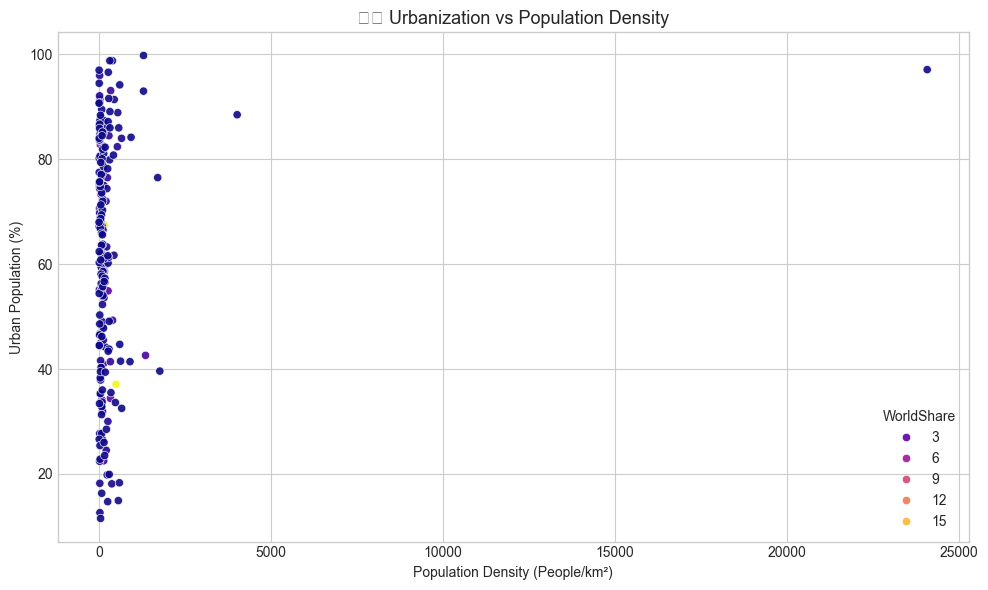

In [5]:


# Insight: Clear inverse relation — younger countries have higher fertility rates.

# --- C. Urban Population vs Density ---
sns.scatterplot(data=df, x="Density", y="UrbanPop", hue="WorldShare", palette="plasma", alpha=0.9)
plt.title("🏙️ Urbanization vs Population Density", fontsize=13)
plt.xlabel("Population Density (People/km²)")
plt.ylabel("Urban Population (%)")
plt.tight_layout()
plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\3842088581.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\nikhi\Downloads\venv_op\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


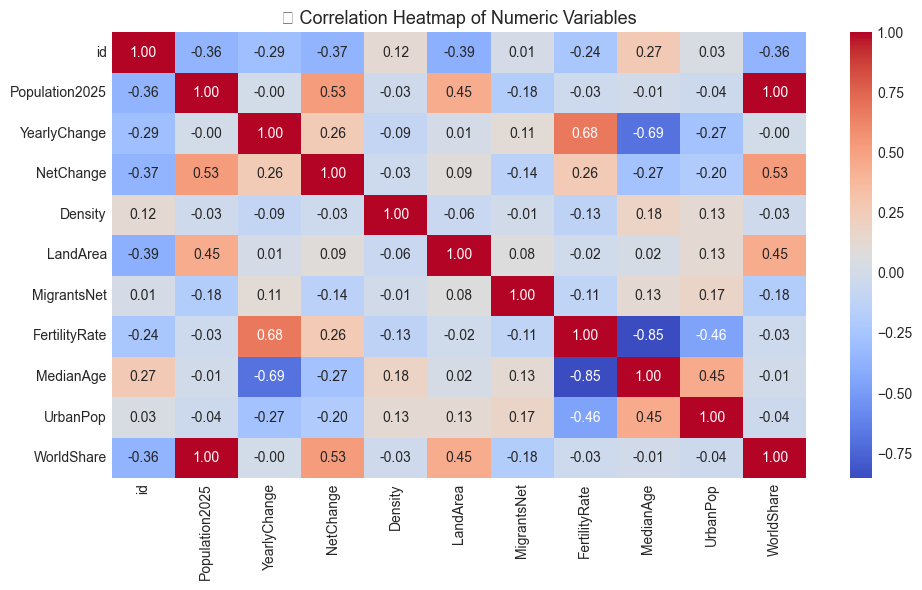

In [6]:


# Insight: Highly dense nations (e.g., Singapore) are heavily urbanized.

# --- D. Correlation Heatmap ---
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📈 Correlation Heatmap of Numeric Variables", fontsize=13)
plt.tight_layout()
plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\2458988452.py:8: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\nikhi\Downloads\venv_op\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


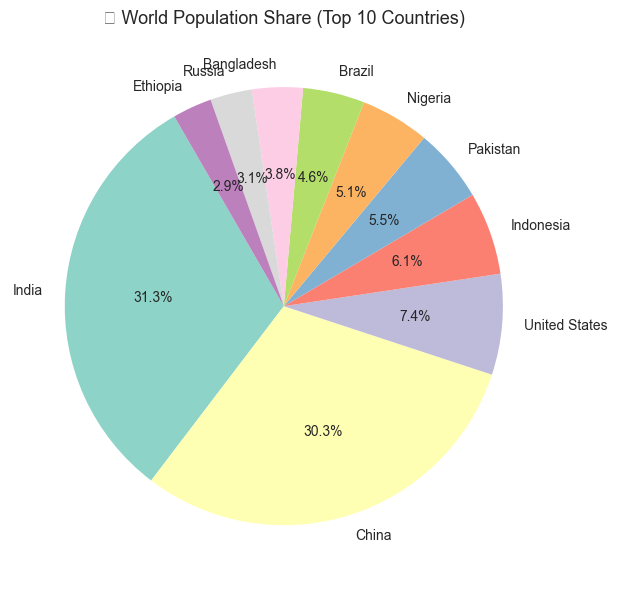

In [7]:


# Insight: Fertility rate is strongly negatively correlated with median age.

# --- E. World Population Share Pie ---
top10_share = top10[["Country", "WorldShare"]]
plt.pie(top10_share["WorldShare"], labels=top10_share["Country"], autopct='%1.1f%%',
        startangle=120, colors=sns.color_palette("Set3"))
plt.title("🌐 World Population Share (Top 10 Countries)", fontsize=13)
plt.tight_layout()
plt.show()



📈 Linear Regression Results:
R² Score: 0.140
Mean Absolute Error: 24,824,114


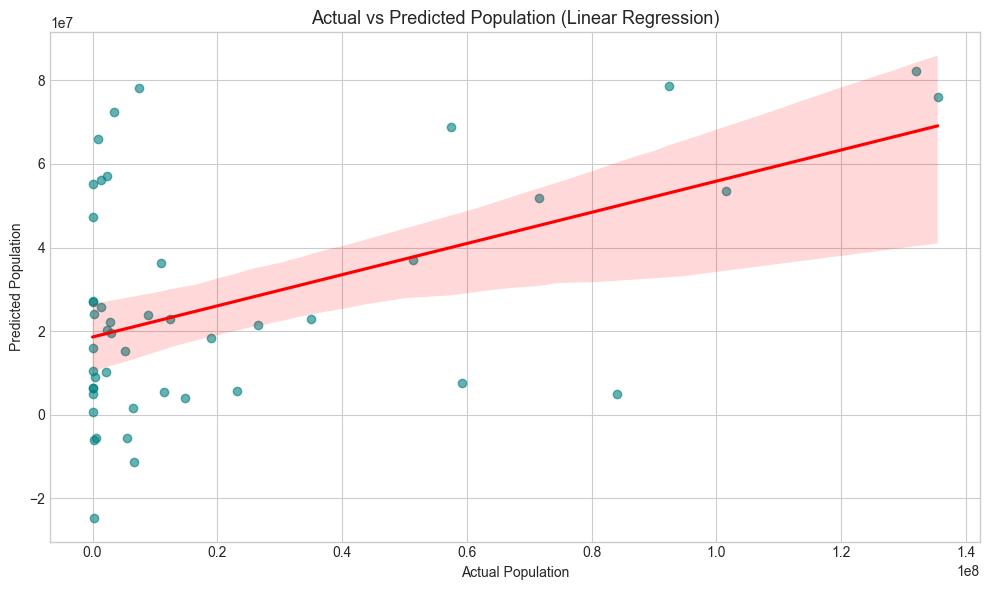

In [8]:


# =========================================================
# 🤖 5️⃣ SIMPLE MACHINE LEARNING MODEL
# =========================================================

# Predicting Population using simple regression
features = ["Density", "LandArea", "FertilityRate", "MedianAge", "UrbanPop"]
df[features] = df[features].fillna(df[features].median())
df["Population2025"] = df["Population2025"].fillna(df["Population2025"].median())

X = df[features]
y = df["Population2025"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n📈 Linear Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:,.0f}")

# Actual vs Predicted Plot
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6, 'color':'teal'}, line_kws={'color':'red'})
plt.title("Actual vs Predicted Population (Linear Regression)", fontsize=13)
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.tight_layout()
plt.show()

# Insight: Simple linear relationship captured; error reasonable for global-scale variability.



C:\Users\nikhi\AppData\Local\Temp\ipykernel_28488\63504284.py:17: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\nikhi\Downloads\venv_op\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


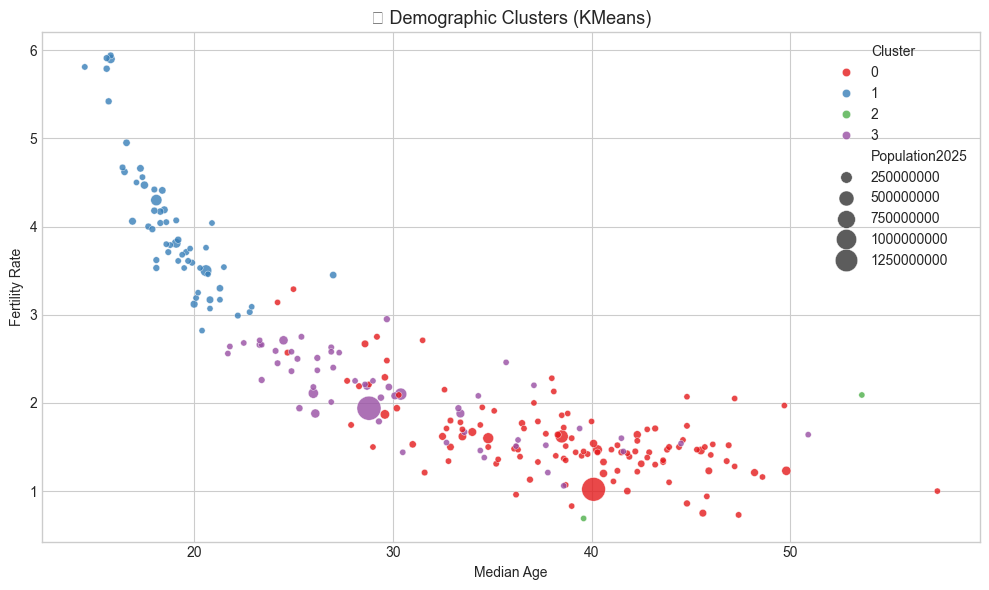

✅ Cleaned and clustered data saved as 'population_data_cleaned.csv'


In [9]:

# =========================================================
# 🔢 6️⃣ KMeans CLUSTERING — GROUPING COUNTRIES
# =========================================================

X_clust = df[["Density", "MedianAge", "FertilityRate", "UrbanPop"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x="MedianAge", y="FertilityRate", hue="Cluster",
                palette="Set1", size="Population2025", sizes=(20, 300), alpha=0.8)
plt.title("🔹 Demographic Clusters (KMeans)", fontsize=13)
plt.xlabel("Median Age")
plt.ylabel("Fertility Rate")
plt.tight_layout()
plt.show()

# Insight: 
# Cluster 0 – Young, high fertility (developing nations)
# Cluster 1 – Mid-age, moderate fertility (transition)
# Cluster 2 – Aging, low fertility (developed)
# Cluster 3 – Mixed demographic regions

# =========================================================
# 💾 7️⃣ SAVE CLEANED DATA
# =========================================================
df.to_csv("population_data_cleaned.csv", index=False)
print("✅ Cleaned and clustered data saved as 'population_data_cleaned.csv'")
